<a href="https://colab.research.google.com/github/charlie-aashutosh/Machine-Learning/blob/master/marketing_analytics_retail_supermart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file
df = pd.read_csv("/content/retailData.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
# rows and cols
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# check for the Missing Values.
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# deleting the column
df.drop(["Country", "Postal Code"], axis=1, inplace= True)

In [17]:
df.columns #use chat-gpt to get KPI's

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
# first 5 rows
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
# types of shipping mode
df['Ship Mode'].value_counts() #Operational Efficiency

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<Axes: >

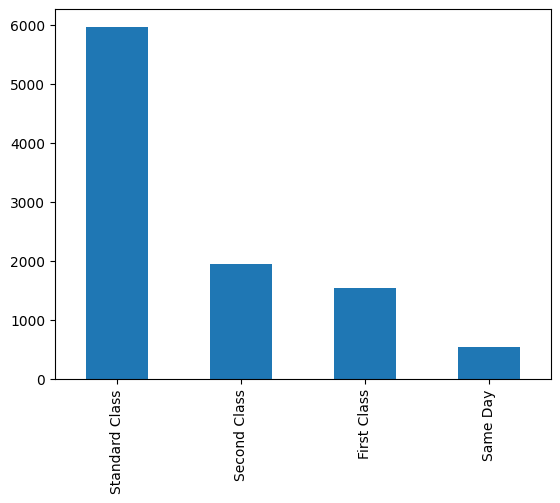

In [20]:
# viz
df['Ship Mode'].value_counts().plot(kind = 'bar') #Analysis of shipping type and number of customersin that category

<Axes: >

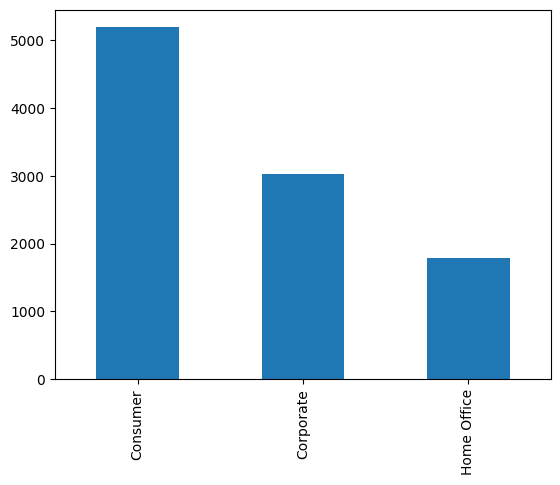

In [14]:
df['Segment'].value_counts().plot(kind = 'bar') # Distribution of sales across customer segments (e.g., consumer, corporate, etc.).

In [ ]:
df['Category'].value_counts(normalize=True)

Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: Category, dtype: float64

<Axes: >

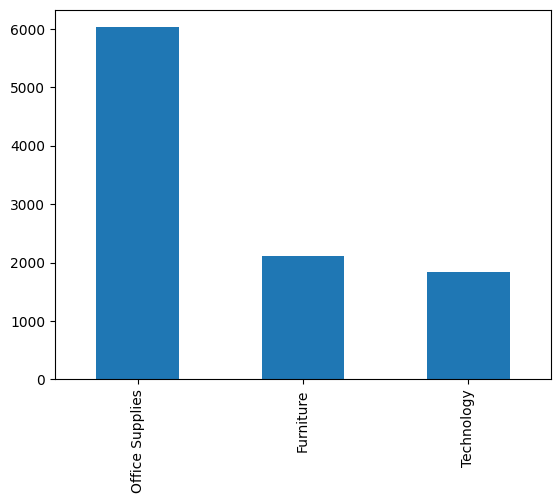

In [21]:
df['Category'].value_counts().plot(kind = 'bar') #Breakdown of sales by product categories and sub-categories.

- office supllies has a major part(60%) in all the transcation.

<Axes: >

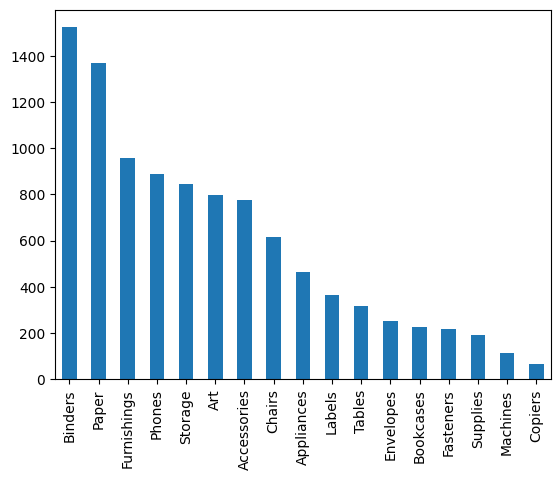

In [22]:
df['Sub-Category'].value_counts().plot(kind = 'bar') #Breakdown of sales by product categories and sub-categories.

### Histogram

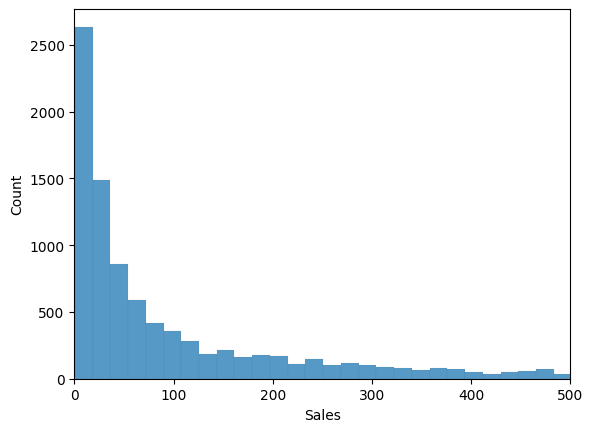

In [25]:
sns.histplot(data = df, x = 'Sales') #Analysis of sales
plt.xlim(0, 500);

In [ ]:
## filtering the data to capture sales with over 10000 USD txn
df[df['Sales']> 10000]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808


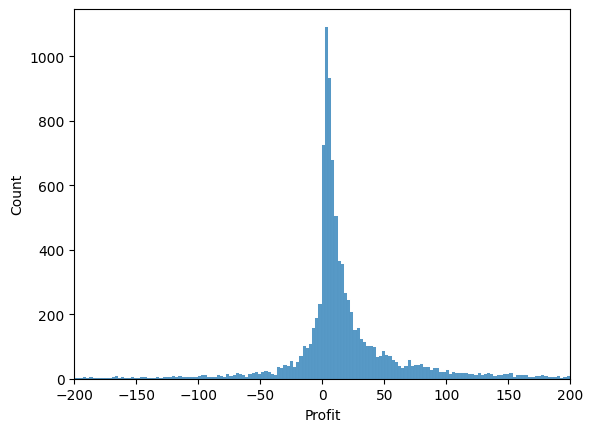

In [ ]:
sns.histplot(data = df, x = 'Profit')ˀ
plt.xlim(-200, 200);

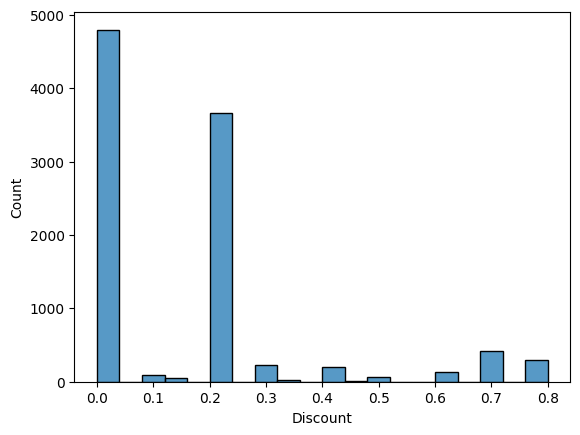

In [ ]:
sns.histplot(data = df, x = 'Discount',bins = 20);

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.head()

## Grouping

In [30]:
city_profit = df.groupby("City")['Profit'].sum().sort_values(ascending=False).reset_index()[:10]
city_profit

,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


<Axes: xlabel='Profit', ylabel='City'>

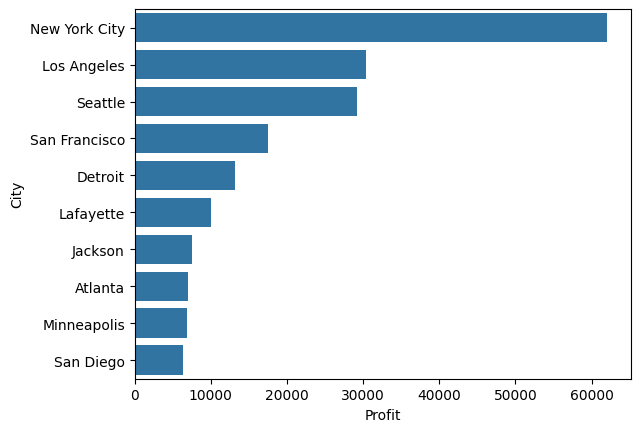

In [31]:
sns.barplot(data = city_profit, y = 'City', x= 'Profit')

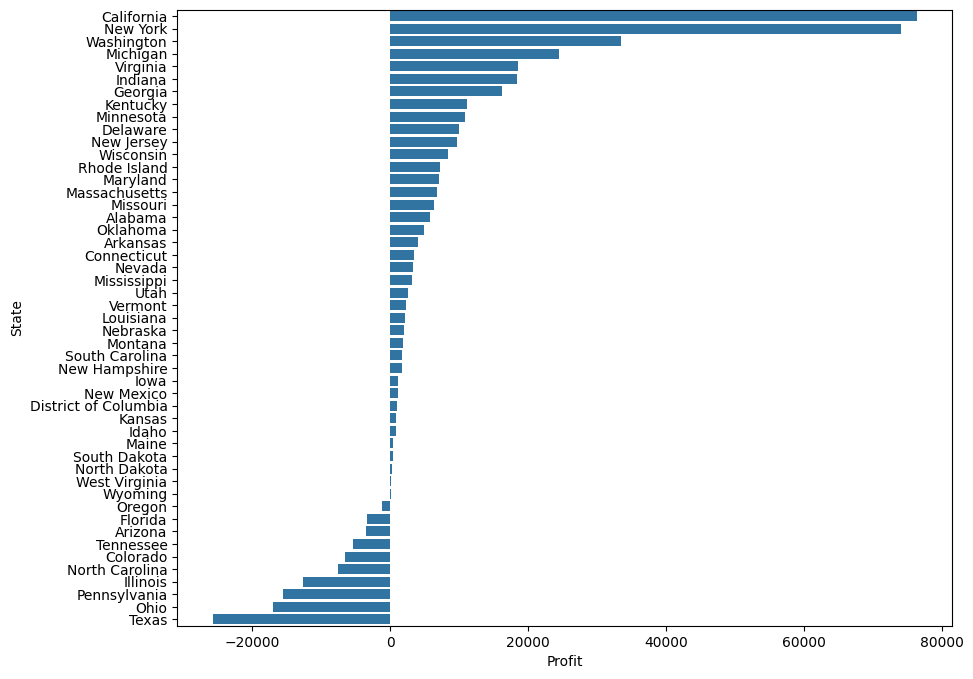

In [32]:
plt.figure(figsize=(10, 8))

state_profit = df.groupby("State")['Profit'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data = state_profit, y = 'State', x= 'Profit');

In [33]:
state_info = df.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)[:10]
state_info

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Texas,170188.0458,-25729.3563
Washington,138641.2700,33402.6517
Pennsylvania,116511.9140,-15559.9603
Florida,89473.7080,-3399.3017
Illinois,80166.1010,-12607.8870
Ohio,78258.1360,-16971.3766
Michigan,76269.6140,24463.1876


<Axes: xlabel='State'>

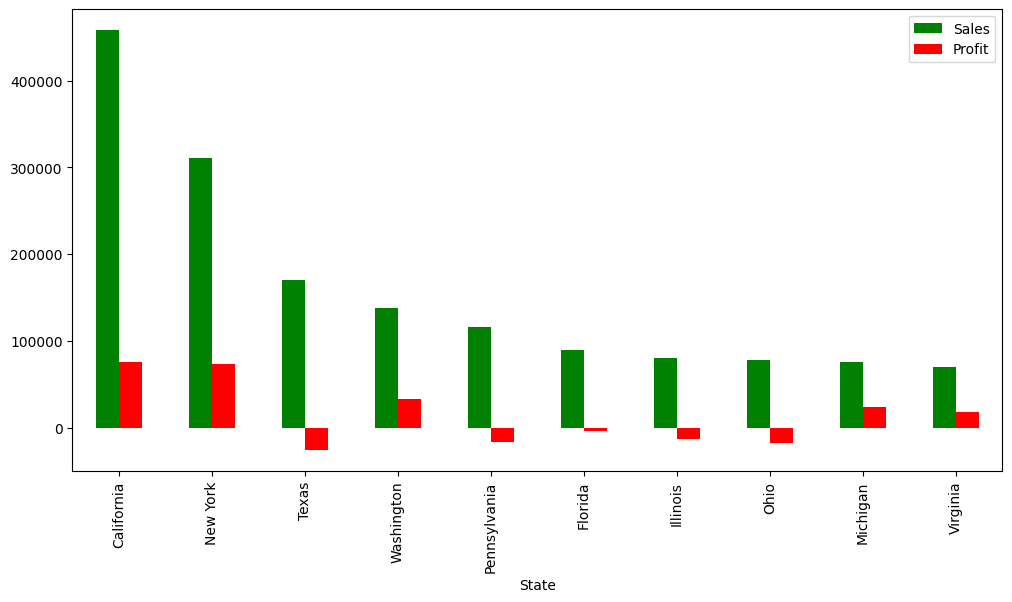

In [34]:
state_info.plot.bar(color = ["Green","Red"], figsize=(12,6))

In [35]:
region_info = df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
region_info

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


<Axes: xlabel='Region'>

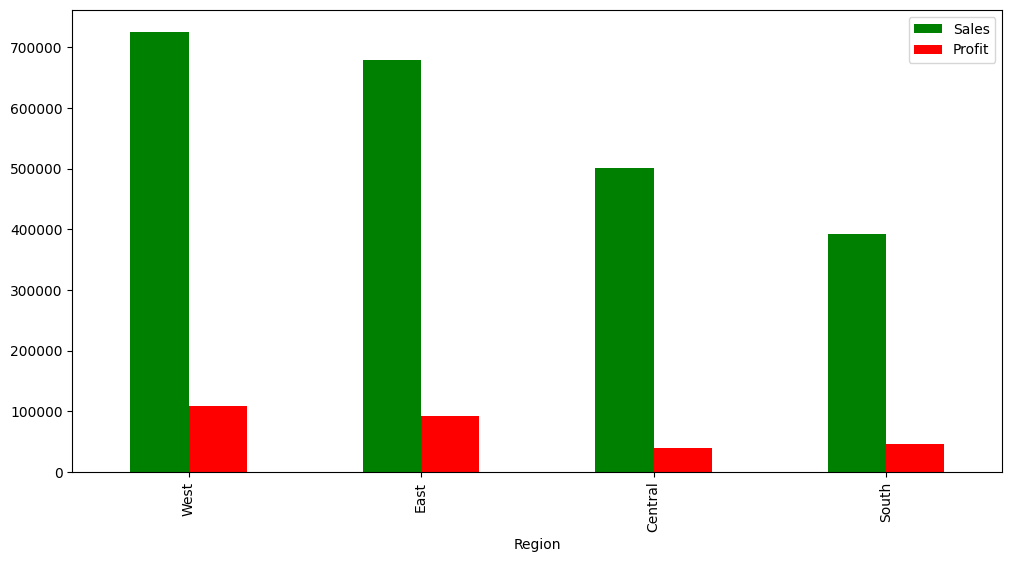

In [36]:
region_info.plot.bar(color = ["Green","Red"], figsize=(12,6))

<Axes: xlabel='Category', ylabel='Sales'>

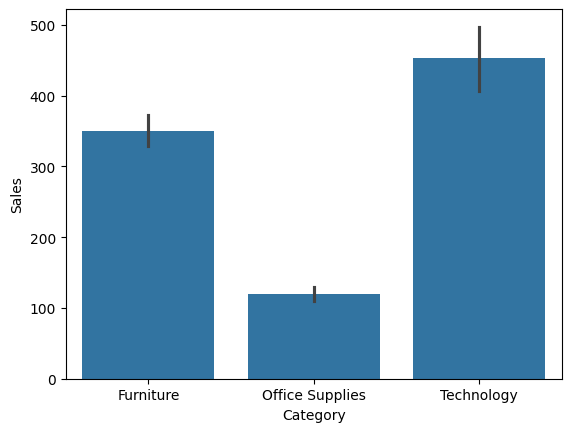

In [37]:
# Category wise Sales.

sns.barplot(data = df, y = 'Sales', x= 'Category')

<Axes: xlabel='Category', ylabel='Profit'>

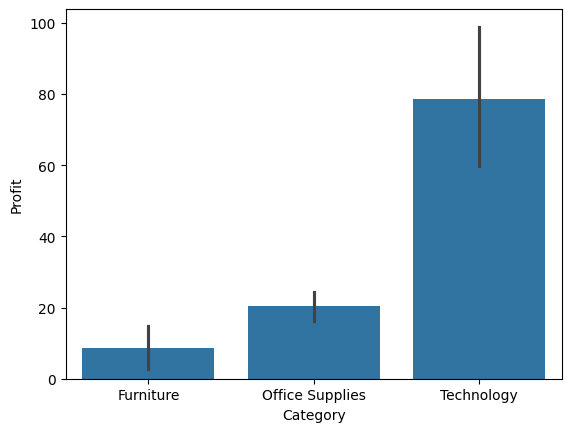

In [38]:
# Categories wise Profit.
sns.barplot(data = df, y = 'Profit', x= 'Category')

In [39]:
sub_category = df.groupby('Sub-Category')['Profit'].sum().sort_values().reset_index()
sub_category[:10]

,Sub-Category,Profit
0,Tables,-17725.4811
1,Bookcases,-3472.5560
2,Supplies,-1189.0995
3,Fasteners,949.5182
4,Machines,3384.7569
5,Labels,5546.2540
6,Art,6527.7870
7,Envelopes,6964.1767
8,Furnishings,13059.1436
9,Appliances,18138.0054


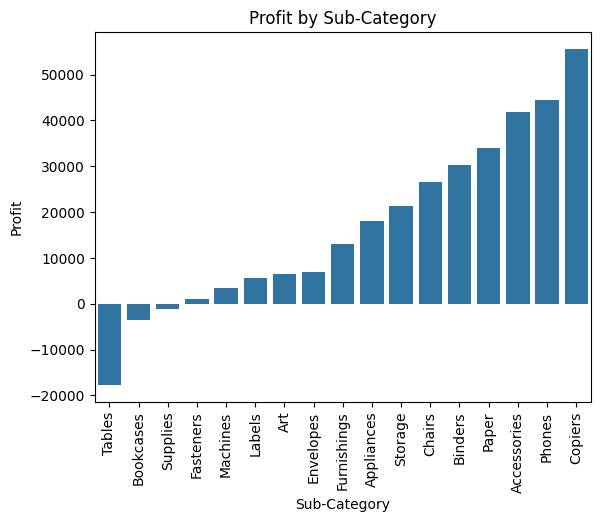

In [40]:
sns.barplot(data=sub_category, x='Sub-Category', y='Profit')
plt.xticks(rotation = 90)
plt.title('Profit by Sub-Category');

<Axes: xlabel='Category', ylabel='Profit'>

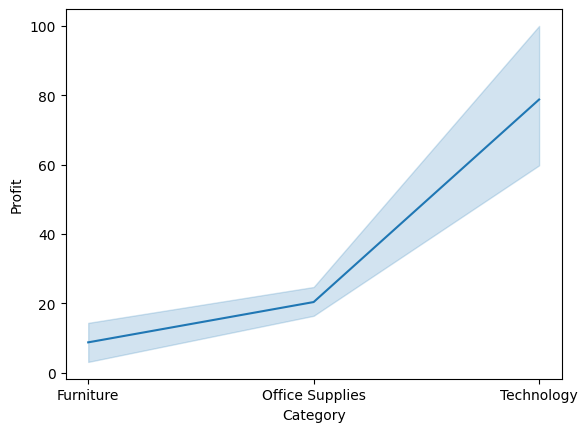

In [43]:
sns.lineplot(data=df, x="Category", y= "Profit")

In [ ]:
# RCA -> root cause analysis.

In [44]:
texas = df[df['State'] == 'Texas']
texas.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
34,Second Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,29.472,3,0.2,9.9468
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737
36,First Class,Corporate,Richardson,Texas,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630


<Axes: >

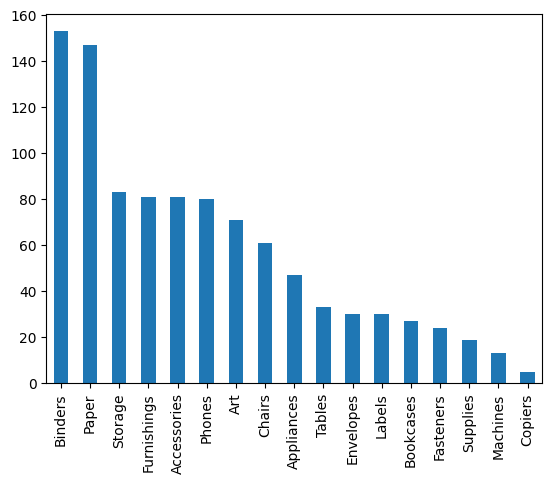

In [45]:
texas['Sub-Category'].value_counts().plot(kind = 'bar')